<a href="https://colab.research.google.com/github/jronald88/K-means-Project/blob/main/explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "/workspaces/K-means-Project/requirements.txt"

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn import tree

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

In [23]:
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
df_clean = df.drop(['HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal'], axis = 1)
df_clean.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Train Test Split


In [26]:
X_train, X_test = train_test_split(df_clean, test_size=0.2, random_state=42)

In [27]:
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [28]:
X_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


In [64]:
model = KMeans(n_clusters=6,n_init = "auto", random_state=42)
model.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [65]:
y_train = list(model.labels_)


In [66]:
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,2
8267,3.8125,33.77,-118.16,2
17445,4.1563,34.66,-120.48,5
14265,1.9425,32.69,-117.11,2
2271,3.5542,36.78,-119.80,5


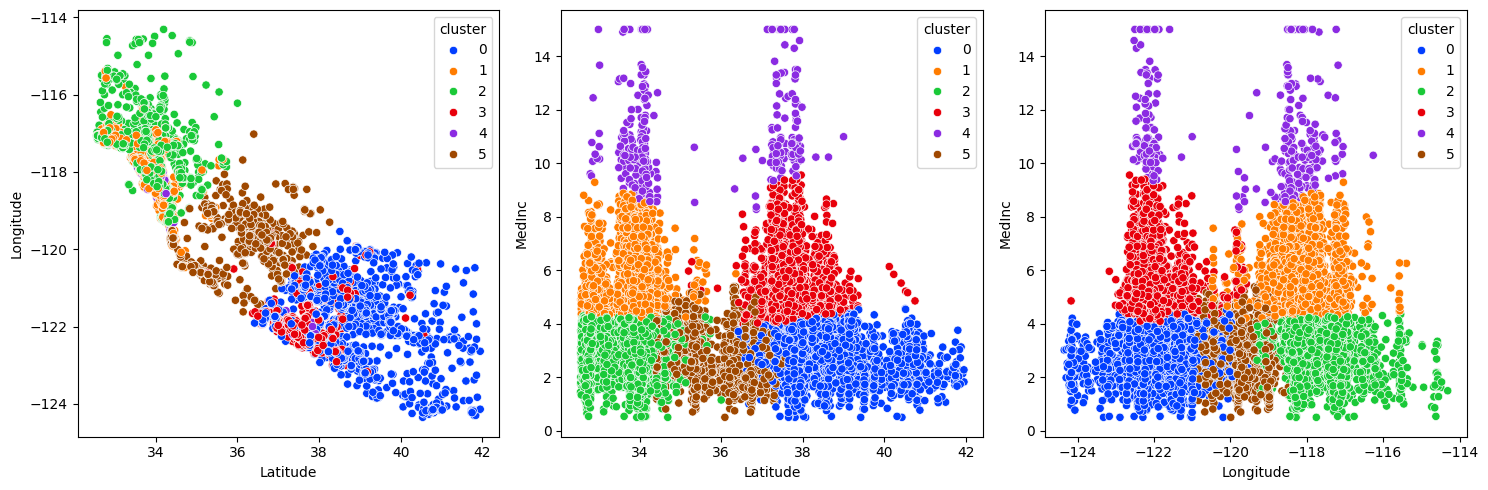

In [67]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright")


plt.tight_layout()

plt.show()

In [68]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,2
3024,2.5313,35.14,-119.46,2
15663,3.4801,37.80,-122.44,0
20484,5.7376,34.28,-118.72,1
9814,3.7250,36.62,-121.93,0


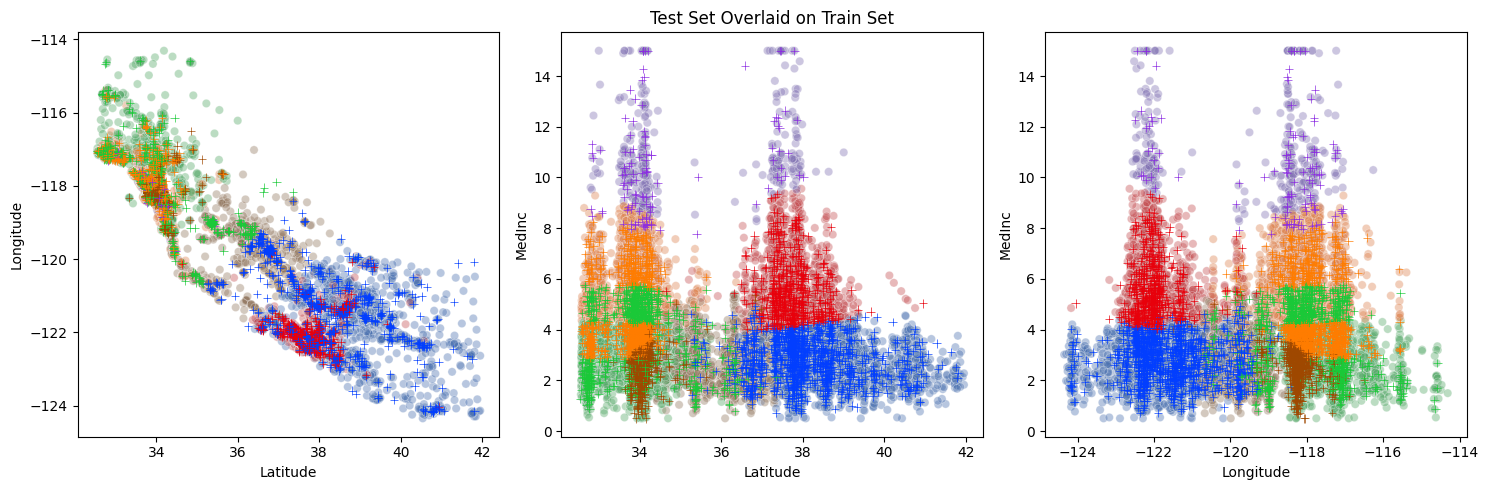

In [99]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))
model.cluster_centers_

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.4)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.4)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.4)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
"""
sns.scatterplot(ax=axis[0], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[1], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[2], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
"""
axis[1].set_title("Test Set Overlaid on Train Set")
plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

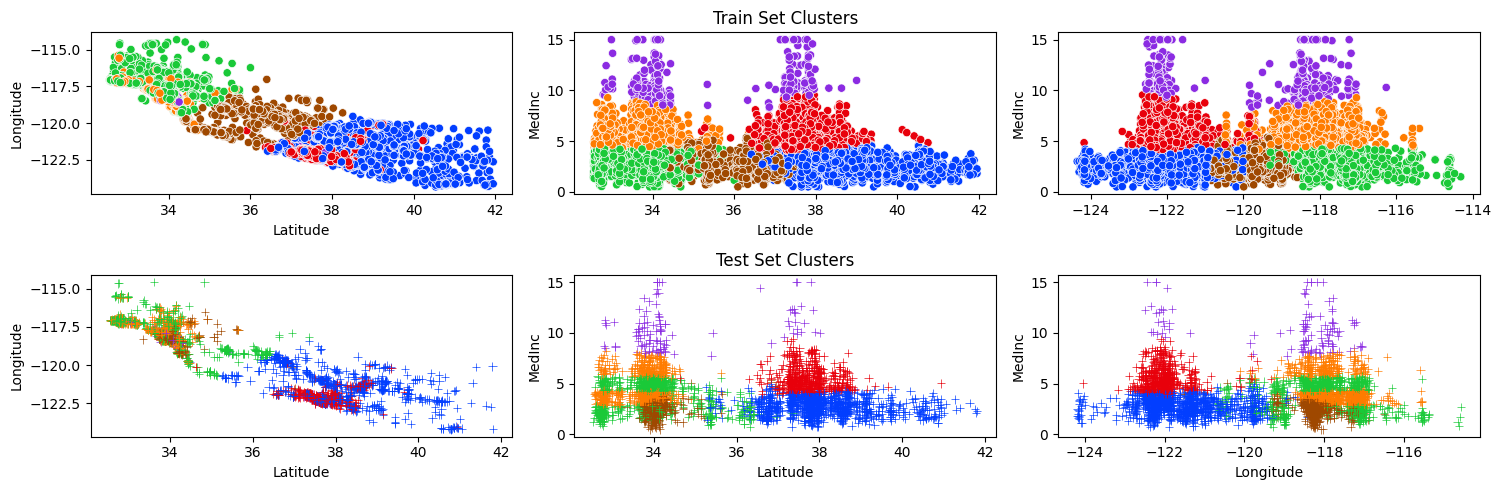

In [79]:
fig, axis = plt.subplots(2, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0,0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[0,1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright")
sns.scatterplot(ax = axis[0,2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright")

cluster_centers = model.cluster_centers_
# Plot the cluster centers using Seaborn's scatterplot function
"""
sns.scatterplot(ax=axis[0, 0], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[0, 1], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[0, 2], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
"""

sns.scatterplot(ax = axis[1,0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[1,1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
sns.scatterplot(ax = axis[1,2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "bright", marker = "+")
"""
sns.scatterplot(ax=axis[1, 0], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[1, 1], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
sns.scatterplot(ax=axis[1, 2], x=cluster_centers[:, 0], y=cluster_centers[:, 1], color='red', marker='x', s=200, label='Cluster Centers')
"""
axis[0,1].set_title("Train Set Clusters")
axis[1,1].set_title("Test Set Clusters")

plt.tight_layout()

for ax in axis.flat:
    ax.legend([],[], frameon=False)

plt.show()

Supervised Machine Learning


In [83]:
model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

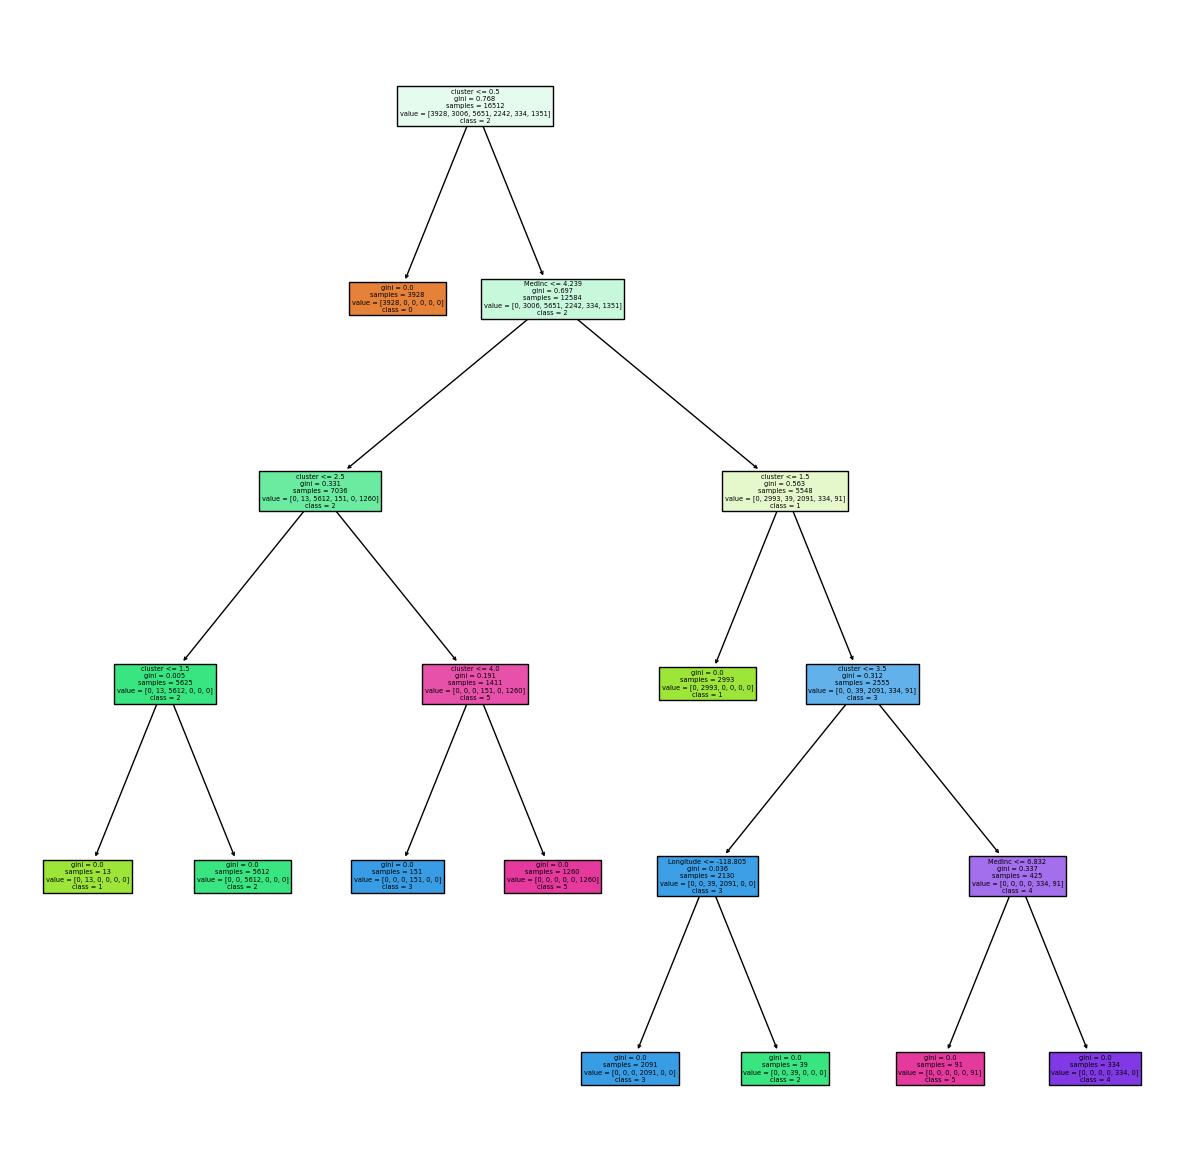

In [86]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [87]:
y_pred = model_sup.predict(X_test)
y_pred

array([2, 2, 0, ..., 3, 0, 1], dtype=int32)

In [89]:
print(accuracy_score(y_test, y_pred))

0.9893410852713178


In [95]:
print(f1_score(y_test, y_pred, average = "weighted"))

0.9894100637181737
